In [ ]:
#1]logistic regression
#first import the necessary library and print dataset with the help of pandas library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pp=pd.read_csv("T-52-Dataset-2-Predicting Approval for Bank Loan.csv")
print(pp)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [ ]:
#it print number of columns and rows which are available within the dataset
pp.shape

(614, 13)

In [ ]:
# it displays mean median mode etc
pp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#it verify that is there any null columns available in dataset if yes it will displays columnwise
pp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#coverting the messy data or inaccurate data in proper format
pp= pp.replace(to_replace='3+', value=4)

In [ ]:
#fill the null values using median and mode
pp['Dependents']=pp['Dependents'].fillna(pp['Dependents'].median())
pp['LoanAmount']=pp['LoanAmount'].fillna(pp['LoanAmount'].median())
pp['Loan_Amount_Term']=pp['Loan_Amount_Term'].fillna(pp['Loan_Amount_Term'].median())
pp['Credit_History']=pp['Credit_History'].fillna(pp['Credit_History'].median())
pp['Gender']=pp['Gender'].fillna(pp['Gender'].mode()[0])
pp['Married']=pp['Married'].fillna(pp['Married'].mode()[0])
pp['Self_Employed']=pp['Self_Employed'].fillna(pp['Self_Employed'].mode()[0])
#check wheather the empty feilds will be filled or not
pp.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#remove the insignificant column from the dataset
ppd=pp.drop(['Loan_ID'],axis=1)
ppd.columns 

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#convert categorical column to numerical column
pp.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
pp.loc[pp["Gender"] == "Male","Gender"]= 1
pp.loc[pp["Gender"] == "Female","Gender"]= 0
pp.replace({"Married":{'No':0,'Yes':1}},inplace=True)
pp.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace=True)
pp.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)
pp.replace({"Property_Area":{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)
#check whether the data will be converted to numerical format or not
pp.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [ ]:
#it displays all statistical info like mean mode etc
pp.describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.653094,0.781759,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.087948,0.687296
std,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.815081,0.463973
min,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


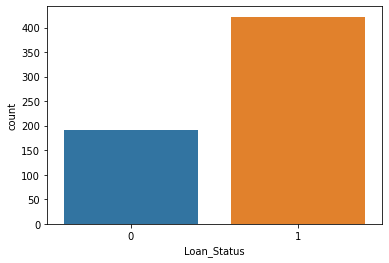

In [ ]:
#perform EDA on dataset using visulization using count plot
sns.countplot(x='Loan_Status',data=pp)

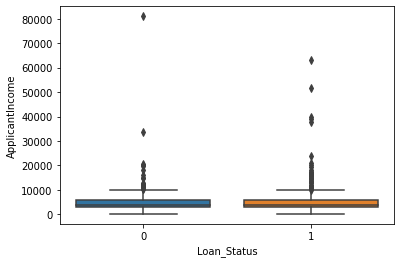

In [ ]:
#perform EDA on dataset using visulization using box plot
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=pp)

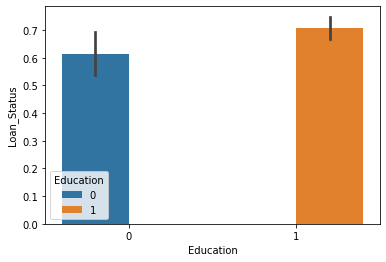

In [ ]:
#perform EDA on dataset using visulization using bar plot
sns.barplot(y='Loan_Status',x='Education',hue='Education',data=pp);

In [ ]:
#apply standardscaler and training and test the data
#importing the necessary library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=pp.drop(['Loan_Status','Loan_ID'],axis=1)
Y=pp['Loan_Status']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=200)
pd.DataFrame(X_train).describe()
StandardScaler=StandardScaler()
StandardScaler.fit(X_train.values)
x_scaled=StandardScaler.transform(X_train.values)
pd.DataFrame(x_scaled).describe()
mymodel=LogisticRegression()
result=mymodel.fit(X_train.values,Y_train.values)
prediction=result.predict(X_test.values)
print(prediction)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1]


In [ ]:
#accuracy using logisticregression
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, prediction)


0.7804878048780488

In [ ]:
#it display the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
confusion_mat=confusion_matrix(Y_test,prediction)
confusion_pp=pd.DataFrame(confusion_mat,index=['actual neg','actual pos'], columns=['predicted neg','predicted pos'])
print(confusion_pp)

            predicted neg  predicted pos
actual neg             15             23
actual pos              4             81


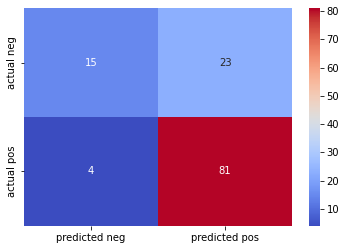

In [ ]:
#confusion matrix result in visulization form
color_conf_matrix=sns.heatmap(confusion_pp,cmap='coolwarm', annot=True)

In [ ]:
#it displays classification matrix
from sklearn import metrics
print("\n classification report \n",metrics.classification_report(Y_test.values,prediction))



 classification report 
               precision    recall  f1-score   support

           0       0.79      0.39      0.53        38
           1       0.78      0.95      0.86        85

    accuracy                           0.78       123
   macro avg       0.78      0.67      0.69       123
weighted avg       0.78      0.78      0.75       123



In [ ]:
#by taking new inputs we can predict new output on the basis of training data
pred_new=mymodel.predict([[1,1,1,1,1,9000,7000,780,000,0.0,0]])
print(pred_new)

[0]


In [ ]:
#2]decision tree
#first import the necessary library and print dataset with the help of pandas library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pp=pd.read_csv("T-52-Dataset-2-Predicting Approval for Bank Loan.csv")
print(pp)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [ ]:
#it print number of columns and rows which are available within the dataset
pp.shape

(614, 13)

In [ ]:
# it displays mean median mode etc
pp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#it verify that is there any null columns available in dataset if yes it will displays columnwise
pp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#coverting the messy data or inaccurate data in proper format
pp= pp.replace(to_replace='3+', value=4)

In [ ]:
#fill the null values using median and mode
pp['Dependents']=pp['Dependents'].fillna(pp['Dependents'].median())
pp['LoanAmount']=pp['LoanAmount'].fillna(pp['LoanAmount'].median())
pp['Loan_Amount_Term']=pp['Loan_Amount_Term'].fillna(pp['Loan_Amount_Term'].median())
pp['Credit_History']=pp['Credit_History'].fillna(pp['Credit_History'].median())
pp['Gender']=pp['Gender'].fillna(pp['Gender'].mode()[0])
pp['Married']=pp['Married'].fillna(pp['Married'].mode()[0])
pp['Self_Employed']=pp['Self_Employed'].fillna(pp['Self_Employed'].mode()[0])
#check wheather the empty feilds will be filled or not
pp.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#remove the insignificant column from the dataset
ppd=pp.drop(['Loan_ID'],axis=1)
ppd.columns 

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#convert categorical column to numerical column
pp.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
pp.loc[pp["Gender"] == "Male","Gender"]= 1
pp.loc[pp["Gender"] == "Female","Gender"]= 0
pp.replace({"Married":{'No':0,'Yes':1}},inplace=True)
pp.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace=True)
pp.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)
pp.replace({"Property_Area":{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)
#check whether the data will be converted to numerical format or not
pp.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [ ]:
#it displays all statistical info like mean mode etc
pp.describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.653094,0.781759,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.087948,0.687296
std,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.815081,0.463973
min,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


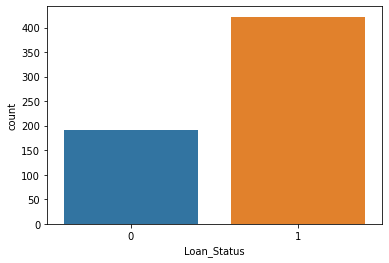

In [ ]:
#perform EDA on dataset using visulization using count plot
sns.countplot(x='Loan_Status',data=pp)

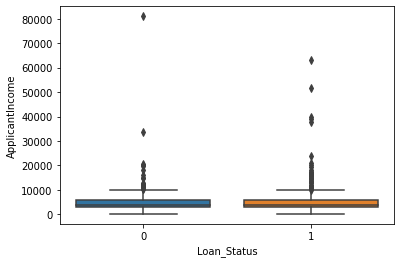

In [ ]:
#perform EDA on dataset using visulization using box plot
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=pp)

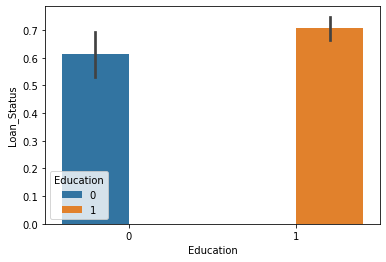

In [ ]:
#perform EDA on dataset using visulization using bar plot
sns.barplot(y='Loan_Status',x='Education',hue='Education',data=pp);

In [ ]:
#apply standardscaler and training and test the data
#importing the necessary library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
X=pp.drop(['Loan_Status','Loan_ID'],axis=1)
Y=pp['Loan_Status']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=200)
pd.DataFrame(X_train).describe()
StandardScaler=StandardScaler()
StandardScaler.fit(X_train.values)
x_scaled=StandardScaler.transform(X_train.values)
pd.DataFrame(x_scaled).describe()
mymodel=DecisionTreeClassifier(random_state=0)
result=mymodel.fit(X_train.values,Y_train.values)
prediction=result.predict(X_test.values)
print(prediction)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1]


In [ ]:
#accuracy and mean_absolute_error using decisiontree alogorithm 
from sklearn.metrics import mean_absolute_error,accuracy_score
mean_absolute_error(Y_test,prediction)

0.21951219512195122

In [ ]:
accuracy_score(Y_test,prediction)

0.7804878048780488

In [ ]:
#it display the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
confusion_mat=confusion_matrix(Y_test,prediction)
confusion_pp=pd.DataFrame(confusion_mat,index=['actual neg','actual pos'], columns=['predicted neg','predicted pos'])
print(confusion_pp)

            predicted neg  predicted pos
actual neg             15             23
actual pos              4             81


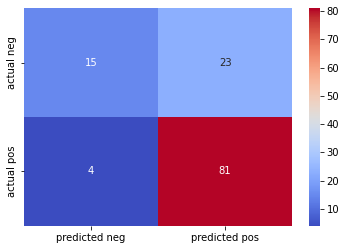

In [ ]:
#confusion matrix result in visulization form
color_conf_matrix=sns.heatmap(confusion_pp,cmap='coolwarm', annot=True)

In [ ]:
#it displays classification matrix
from sklearn import metrics
print("\n classification report \n",metrics.classification_report(Y_test.values,prediction))


 classification report 
               precision    recall  f1-score   support

           0       0.79      0.39      0.53        38
           1       0.78      0.95      0.86        85

    accuracy                           0.78       123
   macro avg       0.78      0.67      0.69       123
weighted avg       0.78      0.78      0.75       123



In [ ]:
#by taking new inputs we can predict new output on the basis of training data
pred_new=mymodel.predict([[1,0,0,1,0,5489,0.0,128.0,360.0,1.0,1]])
print(pred_new)

[1]


In [ ]:
#3]random forest algorithm
#first import the necessary library and print dataset with the help of pandas library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pp=pd.read_csv("T-52-Dataset-2-Predicting Approval for Bank Loan.csv")
print(pp)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [ ]:
#it print number of columns and rows which are available within the dataset
pp.shape

(614, 13)

In [ ]:
# it displays mean median mode etc
pp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#it verify that is there any null columns available in dataset if yes it will displays columnwise
pp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#coverting the messy data or inaccurate data in proper format
pp= pp.replace(to_replace='3+', value=4)

In [ ]:
#fill the null values using median and mode
pp['Dependents']=pp['Dependents'].fillna(pp['Dependents'].median())
pp['LoanAmount']=pp['LoanAmount'].fillna(pp['LoanAmount'].median())
pp['Loan_Amount_Term']=pp['Loan_Amount_Term'].fillna(pp['Loan_Amount_Term'].median())
pp['Credit_History']=pp['Credit_History'].fillna(pp['Credit_History'].median())
pp['Gender']=pp['Gender'].fillna(pp['Gender'].mode()[0])
pp['Married']=pp['Married'].fillna(pp['Married'].mode()[0])
pp['Self_Employed']=pp['Self_Employed'].fillna(pp['Self_Employed'].mode()[0])
#check wheather the empty feilds will be filled or not
pp.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#remove the insignificant column from the dataset
ppd=pp.drop(['Loan_ID'],axis=1)
ppd.columns 

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#convert categorical column to numerical column
pp.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
pp.loc[pp["Gender"] == "Male","Gender"]= 1
pp.loc[pp["Gender"] == "Female","Gender"]= 0
pp.replace({"Married":{'No':0,'Yes':1}},inplace=True)
pp.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace=True)
pp.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)
pp.replace({"Property_Area":{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)
#check whether the data will be converted to numerical format or not
pp.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [ ]:
#it displays all statistical info like mean mode etc
pp.describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.653094,0.781759,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.087948,0.687296
std,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.815081,0.463973
min,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


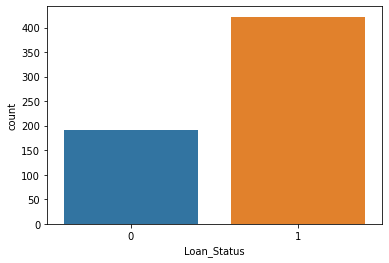

In [ ]:
#perform EDA on dataset using visulization using count plot
sns.countplot(x='Loan_Status',data=pp)

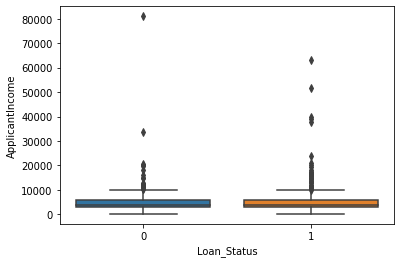

In [ ]:
#perform EDA on dataset using visulization using box plot
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=pp)

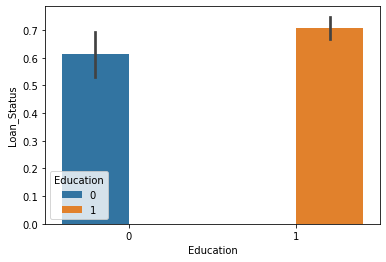

In [ ]:
#perform EDA on dataset using visulization using bar plot
sns.barplot(y='Loan_Status',x='Education',hue='Education',data=pp);

In [ ]:
#apply standardscaler and training and test the data
#importing the necessary library
#spilting tarin and test data
from sklearn.model_selection import train_test_split
X=pp.drop(['Loan_Status','Loan_ID'],axis=1)
Y=pp['Loan_Status']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
pd.DataFrame(X_train).describe()


,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,491.000000,491.000000,491.00000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.663951,0.780041,0.14053,5619.018330,1525.863381,146.537678,342.940937,0.851324,1.085540
std,0.472838,0.414641,0.34789,6659.021257,2787.398712,86.742100,63.284155,0.356132,0.813668
min,0.000000,0.000000,0.00000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,0.000000,1.000000,0.00000,2932.000000,0.000000,102.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.00000,3850.000000,997.000000,128.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,0.00000,5763.000000,2167.500000,161.500000,360.000000,1.000000,2.000000
max,1.000000,1.000000,1.00000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000


In [ ]:
#apply standardscaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)


In [ ]:
X_train
type(X_train)

numpy.ndarray

In [ ]:
#train the data
from sklearn.ensemble import RandomForestClassifier
mymodel=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=54)
result=mymodel.fit(X_train,Y_train)

In [ ]:
#test the data
prediction=result.predict(X_test)
print(prediction)

[1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [ ]:
type(prediction)

numpy.ndarray

In [ ]:
#accuracy  using decisiontree alogorithm 
from sklearn.metrics import accuracy_score
print("accuracy:",accuracy_score(Y_test,prediction))

accuracy: 0.7723577235772358


In [ ]:
#it display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(Y_test,prediction)
confusion_pp=pd.DataFrame(confusion_mat,index=['actual neg','actual pos'], columns=['predicted neg','predicted pos'])
print(confusion_pp)

            predicted neg  predicted pos
actual neg             17             16
actual pos             12             78


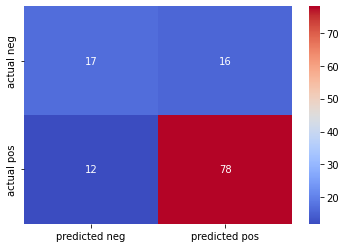

In [ ]:
#confusion matrix result in visulization form
color_conf_matrix=sns.heatmap(confusion_pp,cmap='coolwarm', annot=True)

In [ ]:
#it displays classification matrix
from sklearn import metrics
print("\n classification report \n",metrics.classification_report(Y_test.values,prediction))


 classification report 
               precision    recall  f1-score   support

           0       0.59      0.52      0.55        33
           1       0.83      0.87      0.85        90

    accuracy                           0.77       123
   macro avg       0.71      0.69      0.70       123
weighted avg       0.76      0.77      0.77       123



In [ ]:
#by taking new inputs we can predict new output on the basis of training data
pred_new=mymodel.predict([[1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0]])
print(pred_new)

[1]


In [ ]:
#4]kNN algorithm
#first import the necessary library and print dataset with the help of pandas library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pp=pd.read_csv("T-52-Dataset-2-Predicting Approval for Bank Loan.csv")
print(pp)


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [ ]:
#it print number of columns and rows which are available within the dataset
pp.shape

(614, 13)

In [ ]:
# it displays mean median mode etc
pp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#it verify that is there any null columns available in dataset if yes it will displays columnwise
pp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#coverting the messy data or inaccurate data in proper format
pp= pp.replace(to_replace='3+', value=4)

In [ ]:
#fill the null values using median and mode
pp['Dependents']=pp['Dependents'].fillna(pp['Dependents'].median())
pp['LoanAmount']=pp['LoanAmount'].fillna(pp['LoanAmount'].median())
pp['Loan_Amount_Term']=pp['Loan_Amount_Term'].fillna(pp['Loan_Amount_Term'].median())
pp['Credit_History']=pp['Credit_History'].fillna(pp['Credit_History'].median())
pp['Gender']=pp['Gender'].fillna(pp['Gender'].mode()[0])
pp['Married']=pp['Married'].fillna(pp['Married'].mode()[0])
pp['Self_Employed']=pp['Self_Employed'].fillna(pp['Self_Employed'].mode()[0])
#check wheather the empty feilds will be filled or not
pp.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#remove the insignificant column from the dataset
ppd=pp.drop(['Loan_ID'],axis=1)
ppd.columns 

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#convert categorical column to numerical column
pp.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
pp.loc[pp["Gender"] == "Male","Gender"]= 1
pp.loc[pp["Gender"] == "Female","Gender"]= 0
pp.replace({"Married":{'No':0,'Yes':1}},inplace=True)
pp.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace=True)
pp.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)
pp.replace({"Property_Area":{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)
#check whether the data will be converted to numerical format or not
pp.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [ ]:
#it displays all statistical info like mean mode etc
pp.describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.653094,0.781759,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.087948,0.687296
std,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.815081,0.463973
min,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


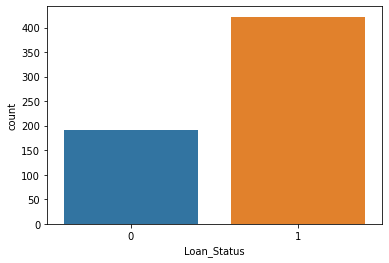

In [ ]:
#perform EDA on dataset using visulization using count plot
sns.countplot(x='Loan_Status',data=pp)

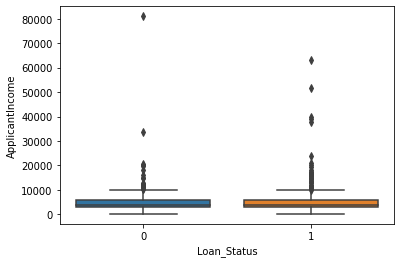

In [ ]:
#perform EDA on dataset using visulization using box plot
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=pp)

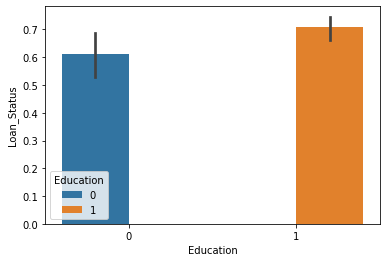

In [ ]:
#perform EDA on dataset using visulization using bar plot
sns.barplot(y='Loan_Status',x='Education',hue='Education',data=pp);

In [ ]:
#apply standardscaler and training and test the data
#importing the necessary library
#spilting tarin and test data
from sklearn.model_selection import train_test_split
X=pp.drop(['Loan_Status','Loan_ID'],axis=1)
Y=pp['Loan_Status']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
pd.DataFrame(X_train).describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,491.000000,491.000000,491.00000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.663951,0.780041,0.14053,5619.018330,1525.863381,146.537678,342.940937,0.851324,1.085540
std,0.472838,0.414641,0.34789,6659.021257,2787.398712,86.742100,63.284155,0.356132,0.813668
min,0.000000,0.000000,0.00000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,0.000000,1.000000,0.00000,2932.000000,0.000000,102.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.00000,3850.000000,997.000000,128.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,0.00000,5763.000000,2167.500000,161.500000,360.000000,1.000000,2.000000
max,1.000000,1.000000,1.00000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000


In [ ]:
#apply standardscaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)


In [ ]:
#train the data
from sklearn.neighbors import KNeighborsClassifier
mymodel=KNeighborsClassifier(n_neighbors=3)
result=mymodel.fit(X_train,Y_train)

In [ ]:
#test the data
prediction=result.predict(X_test)
print(prediction)

[1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 1 0 1 1 0 0 1]


In [ ]:
#accuracy  using KNN alogorithm 
from sklearn import metrics
print("with knn (k=3) accuracy is:",metrics.accuracy_score(Y_test.values,prediction))

with knn (k=3) accuracy is: 0.7642276422764228


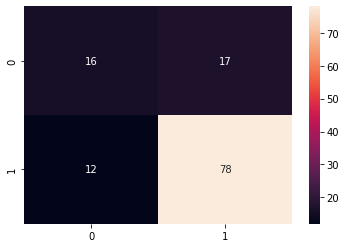

In [ ]:
#it display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(Y_test,prediction)
sns.heatmap(confusion_mat,annot=True,fmt='2.0f')

In [ ]:
#it displays classification matrix
from sklearn import metrics
print("\n classification report \n",metrics.classification_report(Y_test.values,prediction))


 classification report 
               precision    recall  f1-score   support

           0       0.57      0.48      0.52        33
           1       0.82      0.87      0.84        90

    accuracy                           0.76       123
   macro avg       0.70      0.68      0.68       123
weighted avg       0.75      0.76      0.76       123



In [ ]:
#by taking new inputs we can predict new output on the basis of training data
pred_new=mymodel.predict([[0,1,0,1,0,4583,1508.0,128.0,360.0,1.0,0]])
print(pred_new)

[1]


In [ ]:
#5]SVM algorithm
#first import the necessary library and print dataset with the help of pandas library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pp=pd.read_csv("T-52-Dataset-2-Predicting Approval for Bank Loan.csv")
print(pp)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [ ]:
#it print number of columns and rows which are available within the dataset
pp.shape

(614, 13)

In [ ]:
# it displays mean median mode etc
pp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#it verify that is there any null columns available in dataset if yes it will displays columnwise
pp.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#coverting the messy data or inaccurate data in proper format
pp= pp.replace(to_replace='3+', value=4)

In [ ]:
#fill the null values using median and mode
pp['Dependents']=pp['Dependents'].fillna(pp['Dependents'].median())
pp['LoanAmount']=pp['LoanAmount'].fillna(pp['LoanAmount'].median())
pp['Loan_Amount_Term']=pp['Loan_Amount_Term'].fillna(pp['Loan_Amount_Term'].median())
pp['Credit_History']=pp['Credit_History'].fillna(pp['Credit_History'].median())
pp['Gender']=pp['Gender'].fillna(pp['Gender'].mode()[0])
pp['Married']=pp['Married'].fillna(pp['Married'].mode()[0])
pp['Self_Employed']=pp['Self_Employed'].fillna(pp['Self_Employed'].mode()[0])
#check wheather the empty feilds will be filled or not
pp.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#remove the insignificant column from the dataset
ppd=pp.drop(['Loan_ID'],axis=1)
ppd.columns 

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#convert categorical column to numerical column
pp.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
pp.loc[pp["Gender"] == "Male","Gender"]= 1
pp.loc[pp["Gender"] == "Female","Gender"]= 0
pp.replace({"Married":{'No':0,'Yes':1}},inplace=True)
pp.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace=True)
pp.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)
pp.replace({"Property_Area":{'Rural':0,'Urban':1,'Semiurban':2}},inplace=True)
#check whether the data will be converted to numerical format or not
pp.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [ ]:
#it displays all statistical info like mean mode etc
pp.describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.653094,0.781759,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.087948,0.687296
std,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.815081,0.463973
min,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


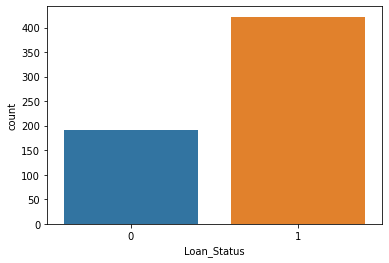

In [ ]:
#perform EDA on dataset using visulization using count plot
sns.countplot(x='Loan_Status',data=pp)

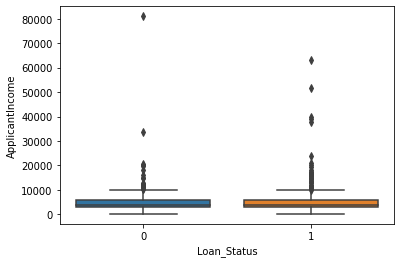

In [ ]:
#perform EDA on dataset using visulization using box plot
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=pp)

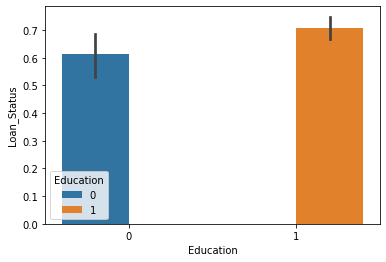

In [ ]:
#perform EDA on dataset using visulization using bar plot
sns.barplot(y='Loan_Status',x='Education',hue='Education',data=pp);

In [ ]:
#apply standardscaler and training and test the data
#importing the necessary library
#spilting tarin and test data
from sklearn.model_selection import train_test_split
X=pp.drop(['Loan_Status','Loan_ID'],axis=1)
Y=pp['Loan_Status']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
pd.DataFrame(X_train).describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,491.000000,491.000000,491.00000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.663951,0.780041,0.14053,5619.018330,1525.863381,146.537678,342.940937,0.851324,1.085540
std,0.472838,0.414641,0.34789,6659.021257,2787.398712,86.742100,63.284155,0.356132,0.813668
min,0.000000,0.000000,0.00000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,0.000000,1.000000,0.00000,2932.000000,0.000000,102.000000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.00000,3850.000000,997.000000,128.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,0.00000,5763.000000,2167.500000,161.500000,360.000000,1.000000,2.000000
max,1.000000,1.000000,1.00000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000


In [ ]:
#apply standardscaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [ ]:
#train the data
from sklearn.svm import SVC
mymodel=SVC(kernel='rbf',random_state=0)
result=mymodel.fit(X_train,Y_train)

In [ ]:
#test the data
prediction=result.predict(X_test)
print(prediction)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [ ]:
#accuracy  using SVM alogorithm 
from sklearn import metrics
print("\n accuracy report \n",metrics.accuracy_score(Y_test.values,prediction))


 accuracy report 
 0.8292682926829268


In [ ]:
#it displays classification matrix
from sklearn import metrics
print("\n classification report \n",metrics.classification_report(Y_test.values,prediction))



 classification report 
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



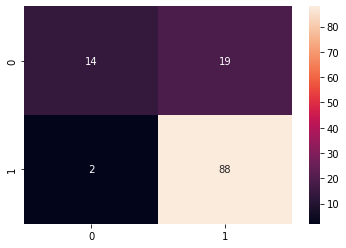

In [ ]:
#it diplay confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(Y_test,prediction)
sns.heatmap(confusion_mat,annot=True,fmt='2.0f')

In [ ]:
#by taking new inputs we can predict new output on the basis of training data
pred_new=mymodel.predict([[0,1,1,1,1,1,1580,1111.0,360.0,1.0,0]])
print(pred_new)

[1]


In [ ]:
#THE algorithms which will gives maximum accuracy is SVM
#accuracy using logisticregression  0.7804878048780488
#accuracy using decisiontree  0.7804878048780488
#accuracy using randomforest 0.7723577235772358
#accuracy using KNN  0.7642276422764228
#accuracy using SVM 0.8292682926829268